In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
raw_tbl <-
    read_tsv(
        'flow-data.csv',
        col_types=cols(
            `Sample:`=col_character(),
            `Donor`=col_factor(levels=c('Donor 30', 'Donor 31', 'Donor 34', 'Donor 35')),
            `Electroporation`=col_factor(levels=c('no DNA', 'NDG plasmid')),
            `Activation`=col_factor(levels=c('No activation', 'Bead', 'PMA/Ionomycin')),
            .default=col_double()
        )
    )

raw_tbl %>% head

Sample:,Donor,Electroporation,Activation,Live | Freq. of Parent,Live/GFP+ | Freq. of Parent
30bead+.fcs,Donor 30,NDG plasmid,Bead,23.8,1.68
30bead-.fcs,Donor 30,no DNA,Bead,43.7,0.16
30noact+.fcs,Donor 30,NDG plasmid,No activation,36.7,0.57
30noact-.fcs,Donor 30,no DNA,No activation,56.7,0.14
30pma+.fcs,Donor 30,NDG plasmid,PMA/Ionomycin,15.9,3.29
30pma-.fcs,Donor 30,no DNA,PMA/Ionomycin,22.9,0.18


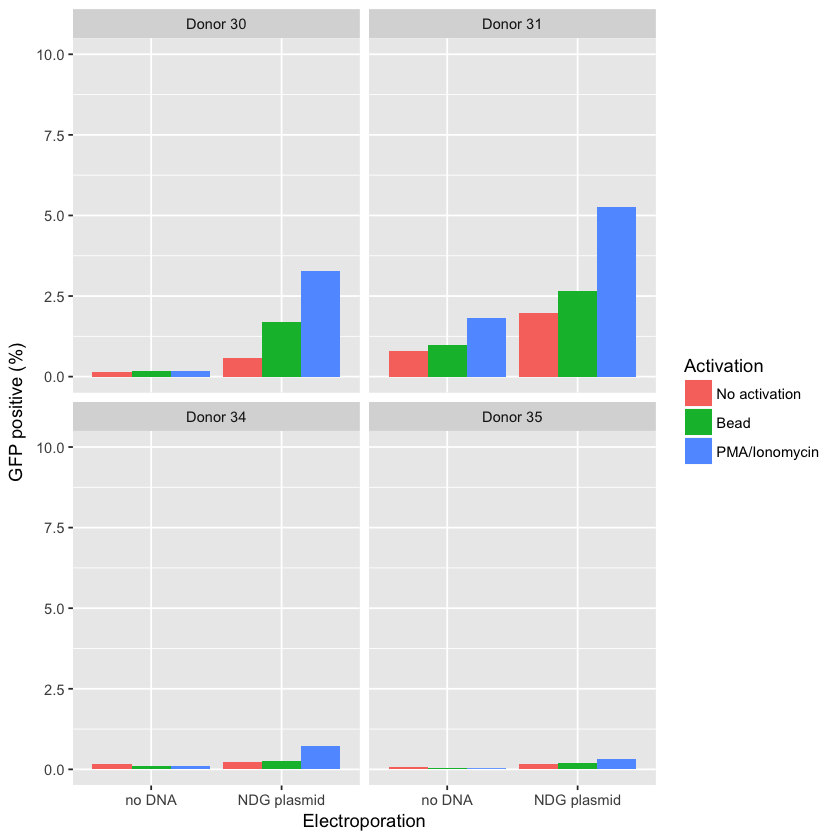

In [3]:
raw_tbl %>%
    ggplot(
        aes(
            x=`Electroporation`,
            y=`Live/GFP+ | Freq. of Parent`,
            fill=`Activation`
        )
    ) +
    geom_col(position='dodge') +
    facet_wrap(~`Donor`) +
    ylab('GFP positive (%)') +
    ylim(0, 10)

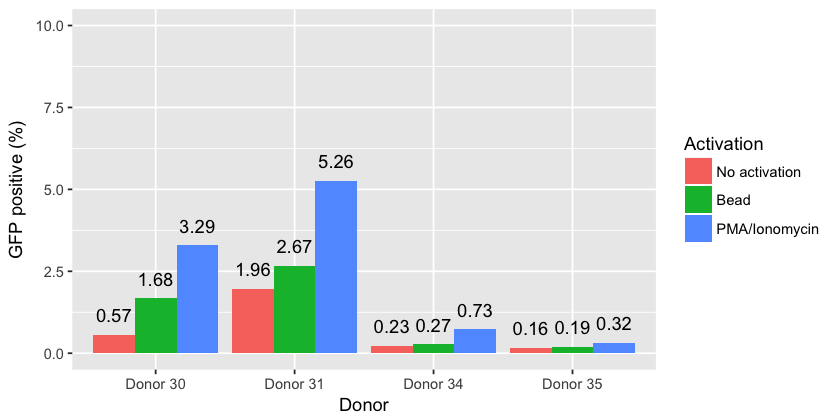

In [4]:
options(repr.plot.width=7, repr.plot.height=3.5)

raw_tbl %>%
    filter(`Electroporation` == 'NDG plasmid') %>%
    ggplot(
        aes(
            x=`Donor`,
            y=`Live/GFP+ | Freq. of Parent`,
            fill=`Activation`
        )
    ) + geom_col(position='dodge') +
    geom_text(aes(label=`Live/GFP+ | Freq. of Parent`), vjust=-1, position=position_dodge(width=.9)) +
    ylab('GFP positive (%)') +
    ylim(0, 10)